# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_column",100)
pd.set_option("display.max_rows",100)

## Reading the dataset

In [2]:
Data = pd.read_csv("XYZCorp_LendingData.csv")

In [3]:
Data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.7,9,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,15-Jan,171.62,NaN,16-Jan,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,13-Apr,119.66,NaN,13-Sep,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,n,NaN,small_business,real estate business,606xx,IL,8.72,0,1-Nov,2,NaN,NaN,2,0,2956,98.5,10,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,14-Jun,649.91,NaN,16-Jan,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21.0,37,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,15-Jan,357.48,NaN,15-Jan,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,11-Dec,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.9,38,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,16-Jan,67.79,16-Feb,16-Jan,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
Data.shape

(855969, 73)

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  int64  
 3   funded_amnt                  855969 non-null  int64  
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [6]:
Data.dtypes[Data.dtypes == 'float']

funded_amnt_inv                float64
int_rate                       float64
installment                    float64
annual_inc                     float64
dti                            float64
mths_since_last_delinq         float64
mths_since_last_record         float64
revol_util                     float64
out_prncp                      float64
out_prncp_inv                  float64
total_pymnt                    float64
total_pymnt_inv                float64
total_rec_prncp                float64
total_rec_int                  float64
total_rec_late_fee             float64
recoveries                     float64
collection_recovery_fee        float64
last_pymnt_amnt                float64
collections_12_mths_ex_med     float64
mths_since_last_major_derog    float64
annual_inc_joint               float64
dti_joint                      float64
tot_coll_amt                   float64
tot_cur_bal                    float64
open_acc_6m                    float64
open_il_6m               

## EDA

### Handling missing value

In [7]:
df = Data.isnull().sum().reset_index(name='missing')
df.loc[df['missing']>0].sort_values('missing', ascending=False)# Finding the missing values present within the data

,index,missing
52,dti_joint,855529
51,annual_inc_joint,855527
53,verification_status_joint,855527
63,il_util,844360
61,mths_since_rcnt_il,843035
71,inq_last_12m,842681
60,open_il_24m,842681
59,open_il_12m,842681
58,open_il_6m,842681
57,open_acc_6m,842681


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    73 non-null     object
 1   missing  73 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [9]:
Data.isnull().sum().sum() # Number of missing values

17464595

### Removing columns having null values greater than 60 %

In [10]:
Data.dropna("columns","all",513581.4,inplace = True)

In [11]:
Data.shape

(855969, 52)

##### - Columns remaing 52

In [12]:
Data.isnull().sum() #Viewing all columns present in data having null values

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      49443
emp_length                     43061
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
pymnt_plan                         0
purpose                            0
title                             33
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
open_acc                           0
pub_rec                            0
r

### Converting useful columns data type from object for analysis

In [13]:
Data.nunique()

id                            855969
member_id                     855969
loan_amnt                       1368
funded_amnt                     1368
funded_amnt_inv                 8818
term                               2
int_rate                         520
installment                    67349
grade                              7
sub_grade                         35
emp_title                     290910
emp_length                        11
home_ownership                     6
annual_inc                     48163
verification_status                3
issue_d                          103
pymnt_plan                         2
purpose                           14
title                          60953
zip_code                         931
addr_state                        51
dti                             4074
delinq_2yrs                       29
earliest_cr_line                 697
inq_last_6mths                     9
open_acc                          77
pub_rec                           31
r

In [14]:
Data.fillna(0)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,0,10+ years,RENT,24000.0,Verified,11-Dec,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,15-Jan,171.62,0,16-Jan,0.0,1,INDIVIDUAL,0,0.0,0.0,0.0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,n,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,13-Apr,119.66,0,13-Sep,0.0,1,INDIVIDUAL,0,0.0,0.0,0.0,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,0,10+ years,RENT,12252.0,Not Verified,11-Dec,n,small_business,real estate business,606xx,IL,8.72,0,1-Nov,2,2,0,2956,98.5,10,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,14-Jun,649.91,0,16-Jan,0.0,1,INDIVIDUAL,0,0.0,0.0,0.0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec,n,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,15-Jan,357.48,0,15-Jan,0.0,1,INDIVIDUAL,0,0.0,0.0,0.0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,11-Dec,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,16-Jan,67.79,16-Feb,16-Jan,0.0,1,INDIVIDUAL,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,36371250,39102635,10000,10000,10000.0,36 months,11.99,332.10,B,B5,Office Assistant,8 years,RENT,31000.0,Verified,15-Jan,n,debt_consolidation,Debt consolidation,905xx,CA,28.69,0,4-Sep,0,9,1,14037,82.1,15,f,7055.47,7055.47,3971.880000,3971.88,2944.53,1027.35,0.00,0.00,0.00,16-Jan,332.10,16-Feb,16-Jan,0.0,1,INDIVIDUAL,0,0.0,25274.0,17100.0,0
855965,36441262,39152692,24000,24000,24000.0,36 months,11.99,797.03,B,B5,Director of Maintenance,10+ years,MORTGAGE,79000.0,Verified,15-Jan,n,home_improvement,Home improvement,072xx,NJ,3.90,0,Mar-74,1,5,0,8621,84.5,23,f,16933.26,16933.26,9532.390000,9532.39,7066.74,2465.65,0.00,0.00,0.00,16-Jan,797.03,16-Feb,16-Jan,0.0,1,INDIVIDUAL,0,0.0,140285.0,10200.0,0
855966,36271333,38982739,13000,13000,13000.0,60 months,15.99,316.07,D,D2,Radiologist Technologist,5 years,RENT,35000.0,Verified,15-Jan,n,debt_consolidation,Debt consolidation,378xx,TN,30.90,0,3-Sep,0,9,1,11031,61.3,22,w,11155.50,11155.50,3769.740000,3769.74,1844.50,1925.24,0.00,0.00,0.00,16-Jan,316.07,16-Feb,16-Jan,0.0,1,INDIVIDUAL,0,0.0,34178.0,18000.0,0
855967,36490806,39222577,12000,12000,12000.0,60 months,19.99,317.86,E,E3,Painter,1 year,RENT,64400.0,Source Verified,15-Jan,n,debt_consolidation,Debt consolidation,010xx,MA,27.19,1,3-Oct,2,17,0,8254,30.6,20,w,10447.31,10447.31,3787.670000,3787.67,1552.69,2234.98,0.00,0.00,0.00,16-Jan,317.86,16-Feb,16-Jan,1.0,1,INDIVIDUAL,0,0.0,58418.0,27000.0,0


#### Label encoding for neccessary columns

#### Column- Application type

In [15]:
Data['application_type'].value_counts()

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64

<AxesSubplot:xlabel='application_type', ylabel='count'>

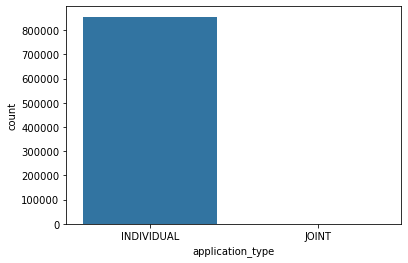

In [16]:
sns.countplot('application_type',data=Data)

In [17]:
df=Data.groupby('application_type')## Grouping based on the output variable
df['default_ind'].value_counts()

application_type  default_ind
INDIVIDUAL        0              809060
                  1               46467
JOINT             0                 442
Name: default_ind, dtype: int64

In [18]:
Data['application_type'] = np.where(Data['application_type']=='INDIVIDUAL', 0, Data['application_type'])
Data['application_type'] = np.where(Data['application_type']=='JOINT', 1, Data['application_type'])

In [19]:
Data['application_type'].value_counts()

0    855527
1       442
Name: application_type, dtype: int64

In [20]:
Data['application_type']=Data['application_type'].astype(float) #Boject to float

#### Column Verification status

In [21]:
df=Data.groupby('verification_status')#Grouping by output
df['default_ind'].value_counts()

verification_status  default_ind
Not Verified         0              245256
                     1               12486
Source Verified      0              303976
                     1               14202
Verified             0              260270
                     1               19779
Name: default_ind, dtype: int64

<AxesSubplot:xlabel='verification_status', ylabel='count'>

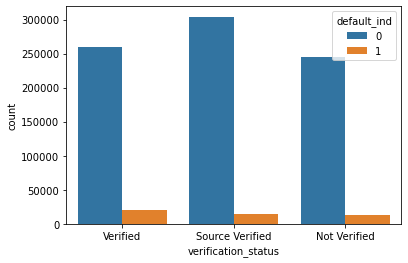

In [22]:
sns.countplot('verification_status',data=Data,hue='default_ind')

In [23]:
df=pd.get_dummies(Data['verification_status'],drop_first=True)
Data=pd.concat([df,Data],axis=1)
del Data['verification_status']

#### Column- Initial list status

In [24]:
Data['initial_list_status'].value_counts()

f    442555
w    413414
Name: initial_list_status, dtype: int64

<AxesSubplot:xlabel='initial_list_status', ylabel='count'>

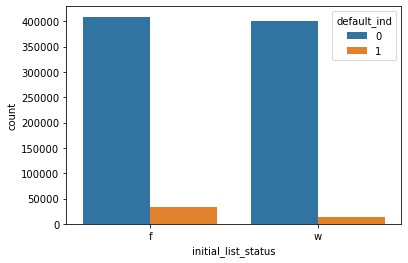

In [25]:
sns.countplot('initial_list_status',data=Data,hue='default_ind')

In [26]:
Data['initial_list_status'] = np.where(Data['initial_list_status']=='f', 0, Data['initial_list_status'])
Data['initial_list_status'] = np.where(Data['initial_list_status']=='w', 1, Data['initial_list_status'])

In [27]:
Data['initial_list_status'].value_counts()

0    442555
1    413414
Name: initial_list_status, dtype: int64

In [28]:
Data['initial_list_status']=Data['initial_list_status'].astype(float)

#### Column- Term

In [29]:
Data['term'].value_counts()

 36 months    600221
 60 months    255748
Name: term, dtype: int64

<AxesSubplot:xlabel='term', ylabel='count'>

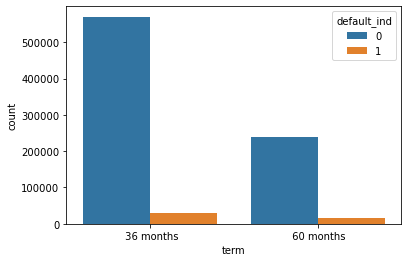

In [30]:
sns.countplot('term',data=Data,hue='default_ind')

In [31]:
Data['term'] = np.where(Data['term']==' 36 months', 0, Data['term'])
Data['term'] = np.where(Data['term']==' 60 months', 1, Data['term'])

In [32]:
Data['term'].value_counts()

0    600221
1    255748
Name: term, dtype: int64

In [33]:
Data['term']=Data['term'].astype(float)

#### Column- Grade

In [34]:
Data['grade'].value_counts()

B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

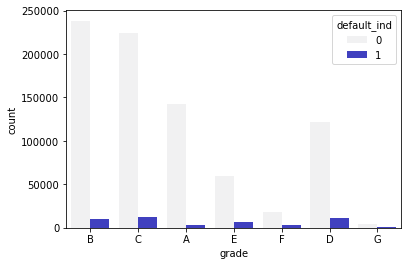

In [35]:
sns.countplot('grade',data=Data,hue='default_ind',color='blue',saturation=0.5)

In [36]:
Data['grade'] = np.where(Data['grade']=='A', 1, Data['grade'])
Data['grade'] = np.where(Data['grade']=='B', 1, Data['grade'])
Data['grade'] = np.where(Data['grade']=='C', 1, Data['grade'])
Data['grade'] = np.where(Data['grade']=='D', 0, Data['grade'])
Data['grade'] = np.where(Data['grade']=='E', 0, Data['grade'])
Data['grade'] = np.where(Data['grade']=='F', 0, Data['grade'])
Data['grade'] = np.where(Data['grade']=='G', 0, Data['grade'])

In [37]:
Data['grade'].value_counts()

1    630518
0    225451
Name: grade, dtype: int64

In [38]:
Data['grade']=Data['grade'].astype(float)

#### Column- Homeowner

In [39]:
Data['home_ownership'].value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

In [40]:
df=Data.groupby('home_ownership')
df['default_ind'].value_counts()

home_ownership  default_ind
ANY             0                   3
MORTGAGE        0              408730
                1               20376
NONE            0                  38
                1                   7
OTHER           0                 117
                1                  27
OWN             0               80001
                1                4135
RENT            0              320613
                1               21922
Name: default_ind, dtype: int64

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

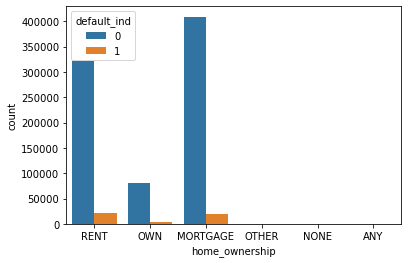

In [41]:
sns.countplot('home_ownership',data=Data,hue='default_ind')

In [42]:
Data['home_ownership'] = np.where(Data['home_ownership']=='RENT', 1, Data['home_ownership'])
Data['home_ownership'] = np.where(Data['home_ownership']=='OWN', 1, Data['home_ownership'])
Data['home_ownership'] = np.where(Data['home_ownership']=='MORTGAGE', 1, Data['home_ownership'])
Data['home_ownership'] = np.where(Data['home_ownership']=='NONE', 2, Data['home_ownership'])
Data['home_ownership'] = np.where(Data['home_ownership']=='OTHER', 2, Data['home_ownership'])
Data['home_ownership'] = np.where(Data['home_ownership']=='ANY', 0, Data['home_ownership'])

In [43]:
Data['home_ownership'].value_counts()

1    855777
2       189
0         3
Name: home_ownership, dtype: int64

In [44]:
df=pd.get_dummies(Data['home_ownership'],drop_first=True)
Data=pd.concat([df,Data],axis=1)
del Data['home_ownership']

#### Column- Payment plan

In [45]:
Data['pymnt_plan'].value_counts()

n    855964
y         5
Name: pymnt_plan, dtype: int64

In [46]:
Data['pymnt_plan'] = np.where(Data['pymnt_plan']=='n', 0, Data['pymnt_plan'])
Data['pymnt_plan'] = np.where(Data['pymnt_plan']=='y', 1, Data['pymnt_plan'])

In [47]:
Data['pymnt_plan'].value_counts()

0    855964
1         5
Name: pymnt_plan, dtype: int64

In [48]:
del Data['pymnt_plan']

In [49]:
Data.dtypes[Data.dtypes == 'object']

sub_grade             object
emp_title             object
emp_length            object
issue_d               object
purpose               object
title                 object
zip_code              object
addr_state            object
earliest_cr_line      object
last_pymnt_d          object
next_pymnt_d          object
last_credit_pull_d    object
dtype: object

#### Removing all object type Features

In [50]:
del Data['sub_grade']
del Data['emp_title']
del Data['emp_length']
del Data['purpose']
del Data['title']
del Data['zip_code']
del Data['addr_state']
del Data['earliest_cr_line']
del Data['last_pymnt_d']
del Data['next_pymnt_d']
del Data['last_credit_pull_d']

### Checking for unwanted columns

In [88]:
# Get the unique count
for col in Data.columns:
    print(col, len(Data[col].unique()))

1 2
2 2
Source Verified 2
Verified 2
loan_amnt 1368
term 2
int_rate 520
installment 67349
grade 2
annual_inc 48163
dti 4074
inq_last_6mths 9
open_acc 77
pub_rec 31
revol_bal 72779
revol_util 1339
total_acc 134
initial_list_status 2
out_prncp 236739
out_prncp_inv 254328
total_pymnt 493510
total_pymnt_inv 494744
total_rec_prncp 250385
total_rec_int 317683
total_rec_late_fee 5320
recoveries 22627
collection_recovery_fee 20388
last_pymnt_amnt 230321
application_type 2
tot_cur_bal 322287
total_rev_hi_lim 20794
default_ind 2


In [52]:
#del Data['id','member_id','emp_title','emp_length','title']

In [53]:
Data = Data.drop(["policy_code"],axis =1)# Dropping the Policy code as it only have one type of value.

#### Removing unwanted columns

In [54]:
del Data['id']
del Data['member_id']

In [55]:
df = Data.isnull().sum().reset_index(name='missing')
df.loc[df['missing']>0].sort_values('missing', ascending=False)

,index,missing
35,tot_coll_amt,67313
36,tot_cur_bal,67313
37,total_rev_hi_lim,67313
19,revol_util,446
32,collections_12_mths_ex_med,56


In [56]:
#Data=Data.fillna(0)
Data['revol_util'].fillna(Data['revol_util'].mean(),inplace=True)

In [57]:
Data.head()

,1,2,Source Verified,Verified,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,annual_inc,issue_d,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1,0,0,1,5000,5000,4975.0,0.0,10.65,162.87,1.0,24000.0,11-Dec,27.65,0,1,3,0,13648,83.7,9,0.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,0.0,0,NaN,NaN,NaN,0
1,1,0,1,0,2500,2500,2500.0,1.0,15.27,59.83,1.0,30000.0,11-Dec,1.00,0,5,3,0,1687,9.4,4,0.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,0.0,0,NaN,NaN,NaN,1
2,1,0,0,0,2400,2400,2400.0,0.0,15.96,84.33,1.0,12252.0,11-Dec,8.72,0,2,2,0,2956,98.5,10,0.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,0.0,0,NaN,NaN,NaN,0
3,1,0,1,0,10000,10000,10000.0,0.0,13.49,339.31,1.0,49200.0,11-Dec,20.00,0,1,10,0,5598,21.0,37,0.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,0.0,0,NaN,NaN,NaN,0
4,1,0,1,0,3000,3000,3000.0,1.0,12.69,67.79,1.0,80000.0,11-Dec,17.94,0,0,15,0,27783,53.9,38,0.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,0.0,0,NaN,NaN,NaN,0


In [58]:
Data.shape

(855969, 39)

#### Visualization of some columns

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

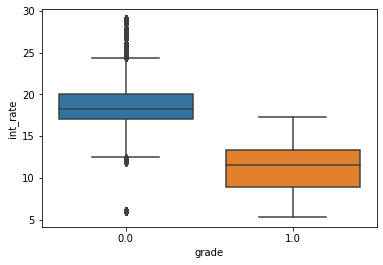

In [59]:
sns.boxplot('grade','int_rate',data=Data)

<AxesSubplot:xlabel='default_ind', ylabel='int_rate'>

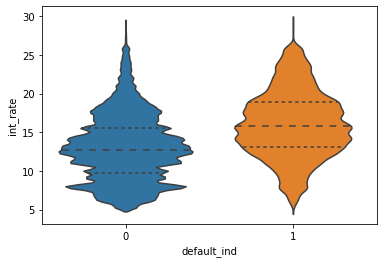

In [60]:
sns.violinplot('default_ind','int_rate',data=Data,bw='scott',inner='quartile')

<AxesSubplot:xlabel='default_ind', ylabel='annual_inc'>

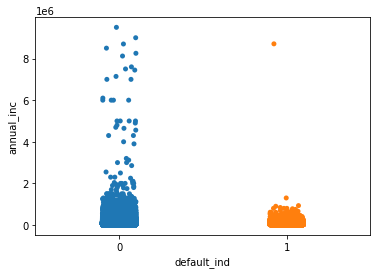

In [61]:
sns.stripplot('default_ind','annual_inc',data=Data,jitter=True)

<AxesSubplot:xlabel='default_ind', ylabel='inq_last_6mths'>

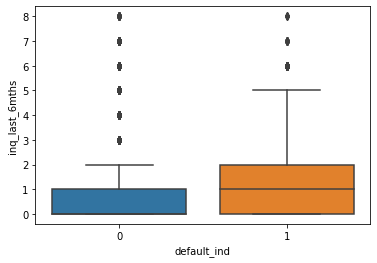

In [62]:
sns.boxplot('default_ind','inq_last_6mths',data=Data)

<AxesSubplot:xlabel='default_ind', ylabel='out_prncp'>

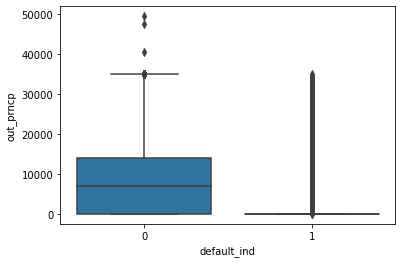

In [63]:
sns.boxplot('default_ind','out_prncp',data=Data)

<AxesSubplot:xlabel='default_ind', ylabel='total_pymnt'>

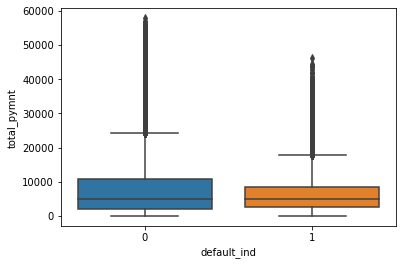

In [64]:
sns.boxplot('default_ind','total_pymnt',data=Data)

<AxesSubplot:xlabel='default_ind', ylabel='total_rec_prncp'>

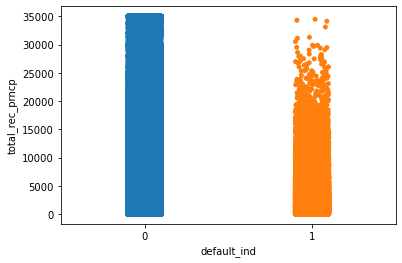

In [65]:
sns.stripplot('default_ind','total_rec_prncp',data=Data,jitter=True)

<AxesSubplot:xlabel='default_ind', ylabel='total_rec_int'>

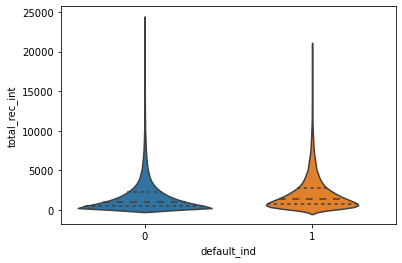

In [66]:
sns.violinplot('default_ind','total_rec_int',data=Data,inner='quartile')

<AxesSubplot:xlabel='default_ind', ylabel='recoveries'>

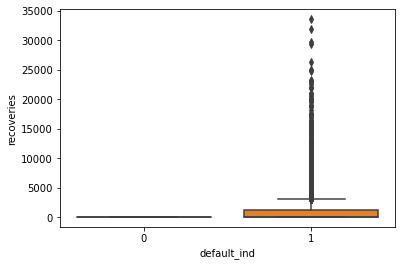

In [67]:
sns.boxplot('default_ind','recoveries',data=Data)

<AxesSubplot:xlabel='default_ind', ylabel='recoveries'>

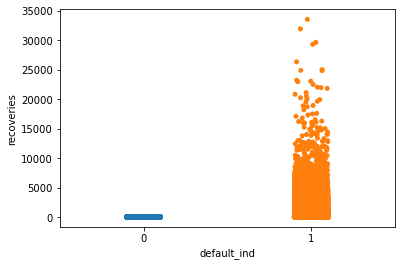

In [68]:
sns.stripplot('default_ind','recoveries',data=Data,jitter=True)

<AxesSubplot:xlabel='default_ind', ylabel='collection_recovery_fee'>

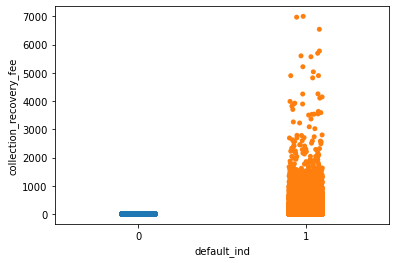

In [69]:
sns.stripplot('default_ind','collection_recovery_fee',data=Data,jitter=True)

<AxesSubplot:xlabel='default_ind', ylabel='last_pymnt_amnt'>

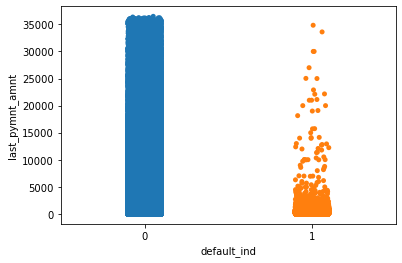

In [70]:
sns.stripplot('default_ind','last_pymnt_amnt',data=Data,jitter=True)

In [71]:
#for col in Date_cols:
#    Date[col] = pd.to_datetime(Date[col], format='%m/%d/%Y')

#### Plotting histogram of all variables and check out the frequency distribution for remaining variables in the dataset

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'Source Verified'}>,
        <AxesSubplot:title={'center':'Verified'}>,
        <AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'funded_amnt'}>],
       [<AxesSubplot:title={'center':'funded_amnt_inv'}>,
        <AxesSubplot:title={'center':'term'}>,
        <AxesSubplot:title={'center':'int_rate'}>,
        <AxesSubplot:title={'center':'installment'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'annual_inc'}>],
       [<AxesSubplot:title={'center':'dti'}>,
        <AxesSubplot:title={'center':'delinq_2yrs'}>,
        <AxesSubplot:title={'center':'inq_last_6mths'}>,
        <AxesSubplot:title={'center':'open_acc'}>,
        <AxesSubplot:title={'center':'pub_rec'}>,
        <AxesSubplot:title={'center':'revol_bal'}>],
       [<AxesSubplot:title={'center':'revol_util'}>,
        <AxesSubplot

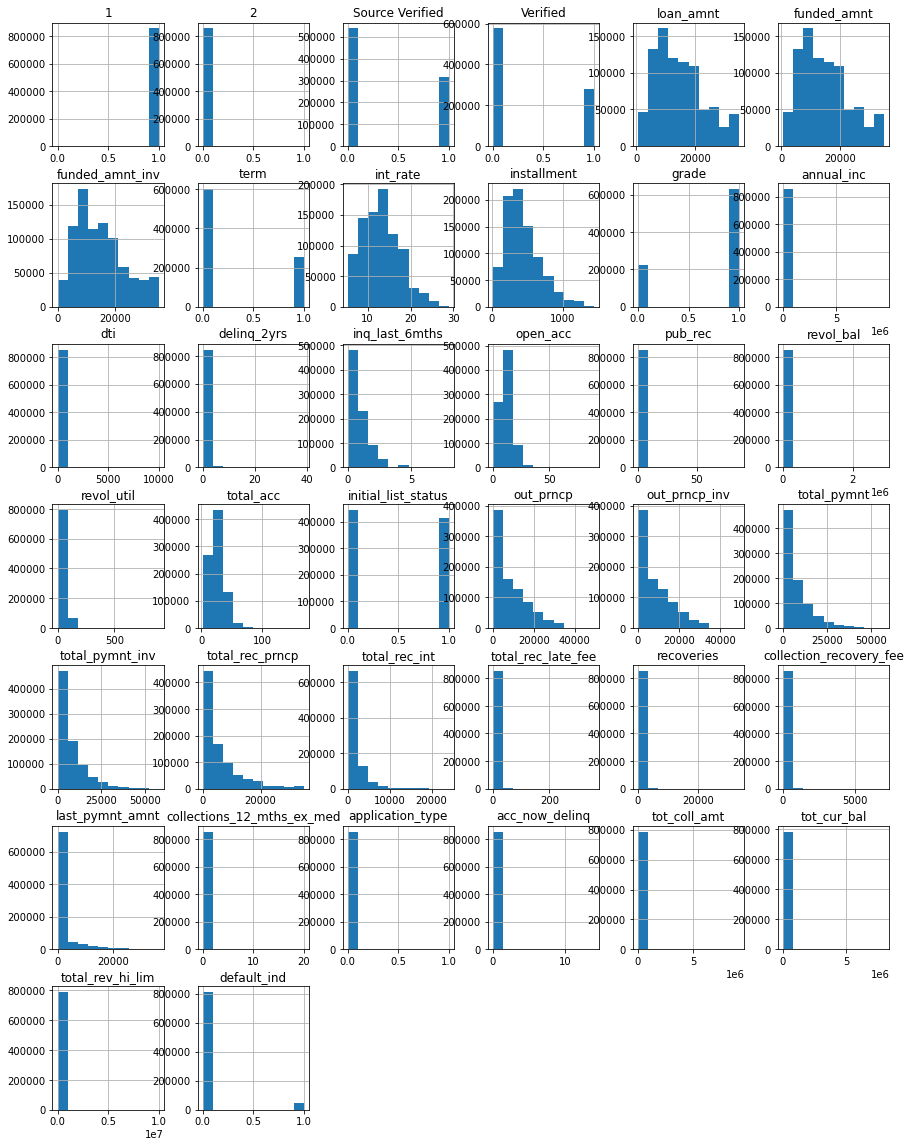

In [72]:
Data.hist(figsize=(15,20))

#### checking the correlation for identify of enstablished relationship in between variables 

In [73]:
lis=Data[Data.columns].corr()['default_ind'][:]
print(Data[Data.columns].corr()['default_ind'][:])
corr=Data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

1                            -0.008118
2                             0.008238
Source Verified              -0.032761
Verified                      0.050291
loan_amnt                    -0.004907
funded_amnt                  -0.005797
funded_amnt_inv              -0.008209
term                          0.031378
int_rate                      0.155037
installment                   0.004753
grade                        -0.103540
annual_inc                   -0.037066
dti                           0.004429
delinq_2yrs                  -0.009186
inq_last_6mths                0.074407
open_acc                     -0.021698
pub_rec                      -0.019607
revol_bal                    -0.020696
revol_util                    0.044475
total_acc                    -0.021087
initial_list_status          -0.098812
out_prncp                    -0.225960
out_prncp_inv                -0.225959
total_pymnt                  -0.039220
total_pymnt_inv              -0.040232
total_rec_prncp          

,1,2,Source Verified,Verified,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
1,1.00,-0.99,0.01,-0.00,0.00,0.00,0.01,0.01,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01
2,-0.99,1.00,-0.01,0.00,-0.00,-0.00,-0.01,-0.01,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.01,-0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.01
Source Verified,0.01,-0.01,1.00,-0.54,0.07,0.07,0.07,0.09,0.00,0.05,-0.02,0.05,-0.01,0.02,-0.03,-0.01,0.04,0.01,0.02,-0.02,0.08,0.13,0.13,-0.07,-0.07,-0.07,-0.03,-0.01,-0.02,-0.01,-0.02,0.02,-0.01,0.01,0.00,-0.02,-0.00,-0.03
Verified,-0.00,0.00,-0.54,1.00,0.20,0.20,0.20,0.09,0.21,0.21,-0.14,0.04,0.04,-0.01,0.08,0.04,0.01,0.08,0.06,0.06,-0.07,0.03,0.03,0.22,0.22,0.18,0.25,0.02,0.05,0.04,0.10,-0.00,0.01,0.01,0.00,0.06,0.04,0.05
loan_amnt,0.00,-0.00,0.07,0.20,1.00,1.00,1.00,0.41,0.14,0.94,-0.14,0.34,0.02,-0.00,-0.03,0.20,-0.08,0.34,0.12,0.22,0.09,0.64,0.64,0.48,0.48,0.40,0.54,0.03,0.08,0.06,0.23,-0.02,0.01,0.00,-0.00,0.33,0.31,-0.00
funded_amnt,0.00,-0.00,0.07,0.20,1.00,1.00,1.00,0.41,0.14,0.95,-0.14,0.34,0.02,-0.00,-0.03,0.20,-0.08,0.34,0.12,0.22,0.09,0.64,0.64,0.48,0.48,0.39,0.54,0.03,0.08,0.05,0.23,-0.02,0.01,0.00,-0.00,0.33,0.31,-0.01
funded_amnt_inv,0.01,-0.01,0.07,0.20,1.00,1.00,1.00,0.41,0.14,0.94,-0.14,0.33,0.02,0.00,-0.03,0.20,-0.08,0.34,0.12,0.22,0.09,0.64,0.64,0.47,0.48,0.39,0.53,0.02,0.07,0.05,0.23,-0.02,0.01,0.00,-0.00,0.33,0.31,-0.01
term,0.01,-0.01,0.09,0.09,0.41,0.41,0.41,1.00,0.43,0.14,-0.35,0.06,0.05,-0.00,-0.00,0.09,-0.03,0.09,0.09,0.10,0.13,0.39,0.39,0.08,0.09,-0.02,0.38,0.00,0.06,0.04,0.07,-0.01,0.01,0.00,-0.00,0.11,0.06,0.03
int_rate,-0.00,0.00,0.00,0.21,0.14,0.14,0.14,0.43,1.00,0.13,-0.77,-0.07,0.08,0.06,0.23,-0.01,0.05,-0.04,0.27,-0.04,-0.11,0.03,0.03,0.17,0.17,0.06,0.45,0.05,0.11,0.07,0.11,0.01,0.01,0.03,0.00,-0.09,-0.17,0.16
installment,0.00,-0.00,0.05,0.21,0.94,0.95,0.94,0.14,0.13,1.00,-0.13,0.33,0.01,0.01,0.00,0.18,-0.07,0.32,0.13,0.20,0.03,0.54,0.54,0.52,0.52,0.46,0.50,0.04,0.08,0.06,0.24,-0.01,0.01,0.01,-0.00,0.30,0.29,0.00


#### Plotting the heatmap for checking out the correlation in betwwen the variables...

<AxesSubplot:>

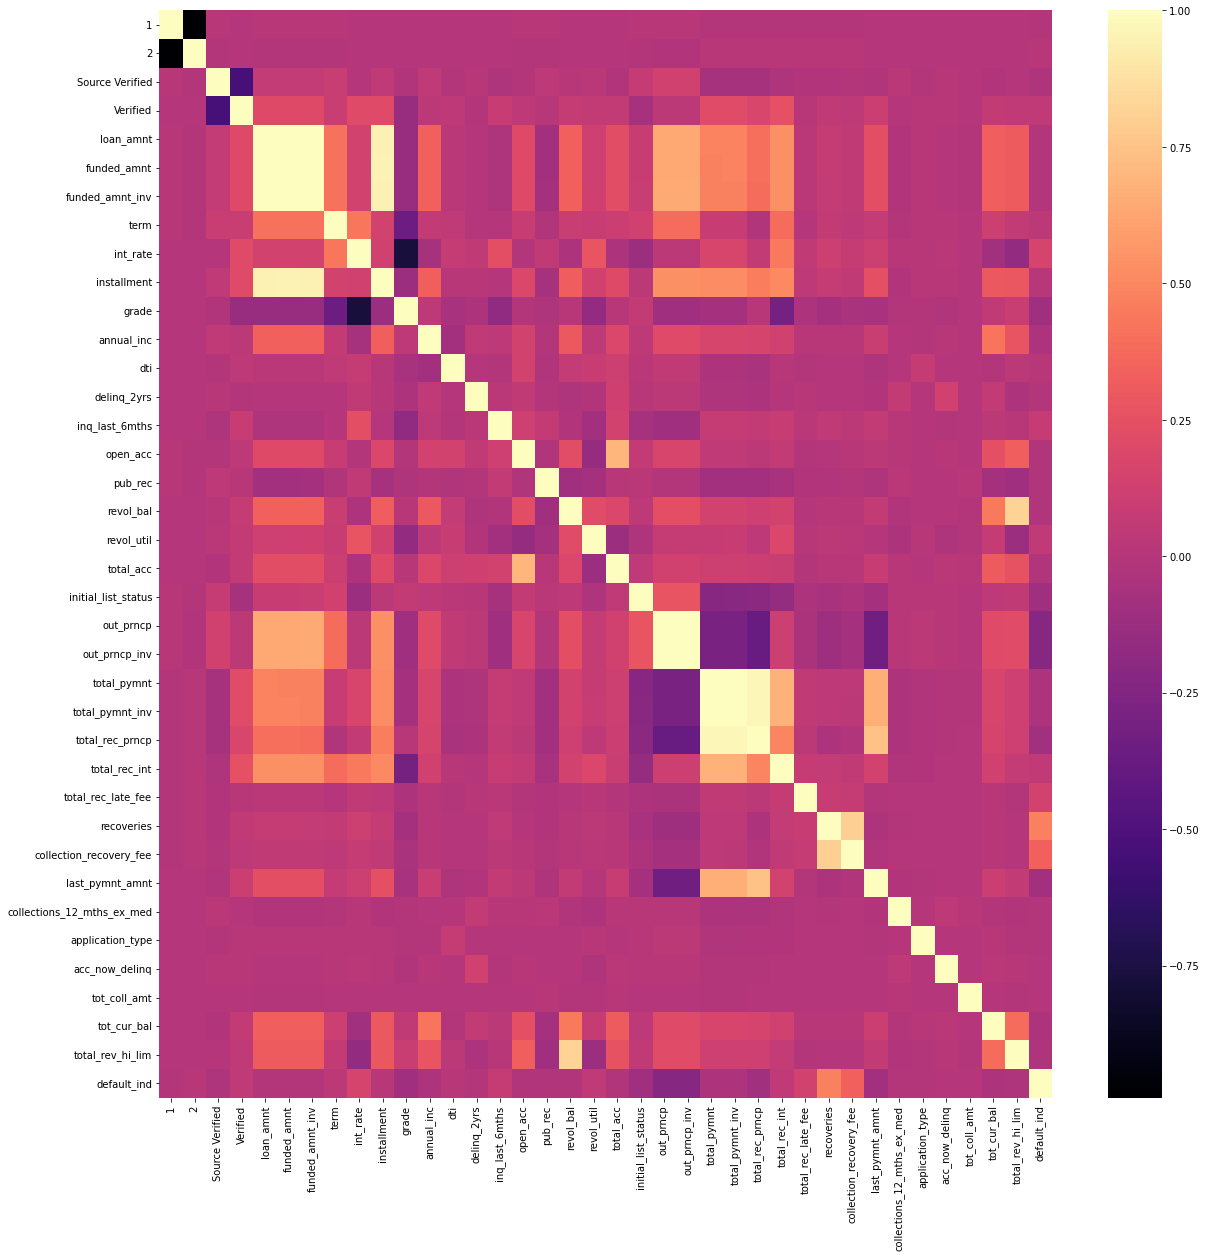

In [74]:
plt.figure(figsize=(20,20))
sns.heatmap(Data.corr(),annot=False,cmap='magma')

#### checking out the continuous variable ploting density plots thats used to observe the distribution of a variable in a dataset.
#### It plots the graph on a continuous interval or time-period, An advantage of Density Plots over Histograms is that they're better at determining the distribution shape because they're not affected by the number of bins.

Text(0.5, 1.0, 'Total committed by Investors')

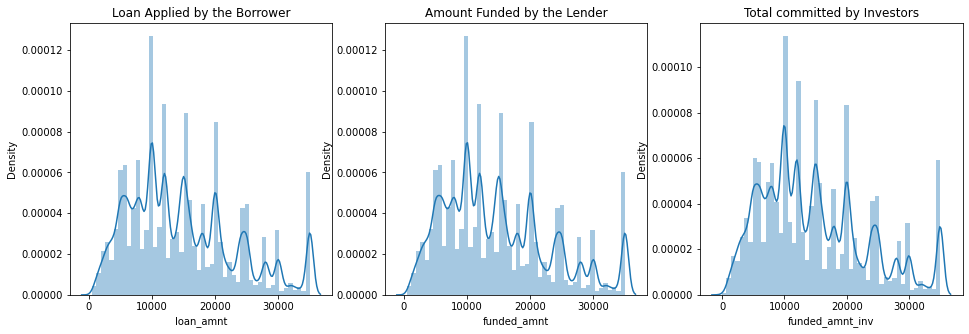

In [75]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))
sns.distplot(Data['loan_amnt'],ax=ax[0])
sns.distplot(Data['funded_amnt'], ax=ax[1])
sns.distplot(Data['funded_amnt_inv'], ax=ax[2])

ax[1].set_title("Amount Funded by the Lender")
ax[0].set_title("Loan Applied by the Borrower")
ax[2].set_title("Total committed by Investors")

#### After ploting the heatmap found variable with very low correlation and had some variable with same distribution
#### we'll treat the model as unnecessary sampled performing again and again, found some highly skewed variable too.

In [76]:
Data=Data.drop(['funded_amnt_inv','funded_amnt','delinq_2yrs','collections_12_mths_ex_med','acc_now_delinq',
                        'tot_coll_amt'],axis=1)

### Splitting data into Independent & Dependent Dataframe

#### Spiting the dataset into X and Y

In [78]:
print(X.shape)
print(Y.shape)

(855969, 32)
(855969,)


In [79]:
train = Data[Data['issue_d'] < '2015-6-01']
test = Data[Data['issue_d'] >= '2015-6-01']

In [80]:
del Data['issue_d']

In [86]:
X=Data.iloc[:,0:-1].values
Y=Data.iloc[:,-1].values

#### Ploting the count plot for the dependent variable and identifying the imbalanced data and perform oversampling technique.

([<matplotlib.axis.XTick at 0x1c90977cb80>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

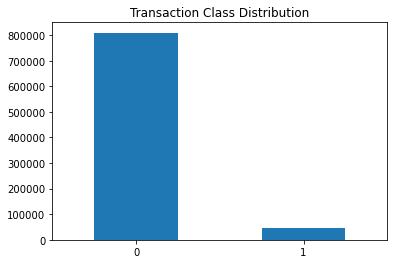

In [81]:
count_classes = pd.value_counts(Data['default_ind'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2))

# Interpretation - It is observed that the y varibale is imbalanced 

### Resampling of the data

#### We'll first split the classified binary numbers in to 'approved', and 'reject' two seperated variable

In [82]:
approved = Data[Data['default_ind']==1]

reject = Data[Data['default_ind']==0]

#### Now will check the shape of stored 0's and 1's in diffrent-diffrent variable

In [83]:
print(approved.shape,reject.shape)

(46467, 32) (809502, 32)


In [84]:
smote=SMOTE()

In [87]:
x_smote,y_smote=smote.fit_resample(X,Y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
smote = SMOTE(random_state = 42)
X_res, Y_res = smote.fit_resample(X, Y)